## ASSIGNMENT-1 : Numerical Simulations
---
**Gaurav Shah 21110064**

The content of this notebook is divided into three parts: 
1. Spring Model
2. Integrate and Fire Model
3. Hudgekins and Huxley model

Each part has the following subsections: Introduction, Methods, Results, Conclusion. (IMRaD)
 

> **NOTE**: \
> This is assignement is implemented in a jupyter notebook. [Link to the notebook on GitHub.](https://github.com/Gaurav-Shah05/Neuron-Modelling/blob/main/notebook.ipynb) The notebook is converted to pdf using [this site](https://www.vertopal.com/en/convert/ipynb-to-pdf).

In [ ]:
# install numpy and matplotlib if not already installed
%pip install -q "numpy" "matplotlib"

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#### **Table of Contents:**
- [1.Spring Model](#1-spring-model)
    - [1.1 Introduction](#11-introduction)
    - [1.2 Methods and Results](#12-methods-and-results)
    - [1.3 Discussion](#13-discussion)
- [2.Integrate and Fire Model](#2-integrate-and-fire-model)
    - [2.1 Introduction](#21-introduction)
    - [2.2 Methods and Results](#22-methods-and-results)
    - [2.3 Discussion](#23-discussion)
- [3.Hodgekins and Huxley Model](#3-hodgekins-and-huxley-model)
    - [3.1 Introduction](#31-introduction)
    - [3.2 Methods and Results](#32-methods-and-results)
    - [3.3 Discussion](#33-discussion)


#### **1. Spring Model**

#### 1.1 Introduction

[back to top ⬆️](#table-of-contents)

The spring model is a simple harmonic oscillator described by the differential equation:

$$ d^2s/dt^2 = -Ps(t) $$

where s(t) is the displacement of the spring, t is time, and P is a constant related to the spring's stiffness.



#### 1.2 Methods and Results

[back to top ⬆️](#table-of-contents)

In [37]:
def spring_model(P, dt, t_max, s0, v0):
    t = np.arange(0, t_max, dt)
    s = np.zeros_like(t)
    v = np.zeros_like(t)
    
    s[0] = s0
    v[0] = v0
    
    for i in range(1, len(t)):
        a = -P * s[i-1]
        v[i] = v[i-1] + a * dt
        s[i] = s[i-1] + v[i] * dt
    
    return t, s

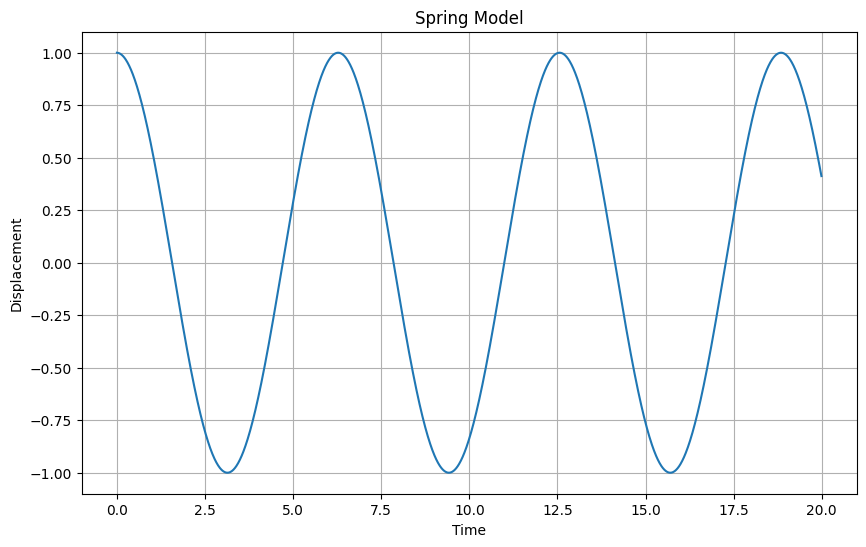

In [38]:
t, s = spring_model(P=1, dt=0.01, t_max=20, s0=1, v0=0)

plt.figure(figsize=(10, 6))
plt.plot(t, s)
plt.title('Spring Model')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.grid(True)
plt.show()


#### 1.3 Discussion 

[back to top ⬆️](#table-of-contents)

The spring model code implements a simple harmonic oscillator:

1. `spring_model` takes parameters P (spring constant), dt (time step), t_max (total simulation time), s0 (initial position), and v0 (initial velocity).
2. The function initializes arrays for time, position, and velocity.
3. It then iterates through time steps, updating position and velocity based on the equations of motion for a simple harmonic oscillator.
4. Finally, it returns the time and position arrays for plotting.


The spring model demonstrates simple harmonic motion. The displacement oscillates sinusoidally around the equilibrium position, with constant amplitude and frequency determined by the spring constant P.


#### **2. Integrate and Fire Model**

#### 2.1 Introduction

[back to top ⬆️](table-of-contents)

The integrate and fire model is a simple model of a neuron that integrates input current and fires an action potential when a threshold is reached. It is described by the equation:

$$ τ dV/dt = RI(t) - V(t) $$

where V is the membrane potential, τ is the membrane time constant, R is the membrane resistance, and I(t) is the input current.


#### 2.2 Methods and Results

[back to top ⬆️](#table-of-contents)

In [39]:
def integrate_and_fire(I, dt, t_max, tau, R, V_rest, V_threshold, V_reset):
    t = np.arange(0, t_max, dt)
    V = np.zeros_like(t)
    V[0] = V_rest
    spikes = []
    
    for i in range(1, len(t)):
        dV = (R * I[i-1] - (V[i-1] - V_rest)) / tau
        V[i] = V[i-1] + dV * dt
        
        if V[i] >= V_threshold:
            V[i] = V_reset
            spikes.append(t[i])
    
    return t, V, spikes

In [40]:
# Parameters
tau = 10  # membrane time constant
R = 10    # membrane resistance
V_rest = -70   # resting potential
V_threshold = -55  # firing threshold
V_reset = -75  # reset potential
dt = 0.1   # time step
t_max = 100  # total simulation time

In [41]:
# Generate different input currents
t = np.arange(0, t_max, dt)
I1 = np.zeros_like(t)
I1[(t >= 10) & (t < 60)] = 2.5  # strong input
I2 = np.zeros_like(t)
I2[(t >= 10) & (t < 60)] = 1.0  # weak input

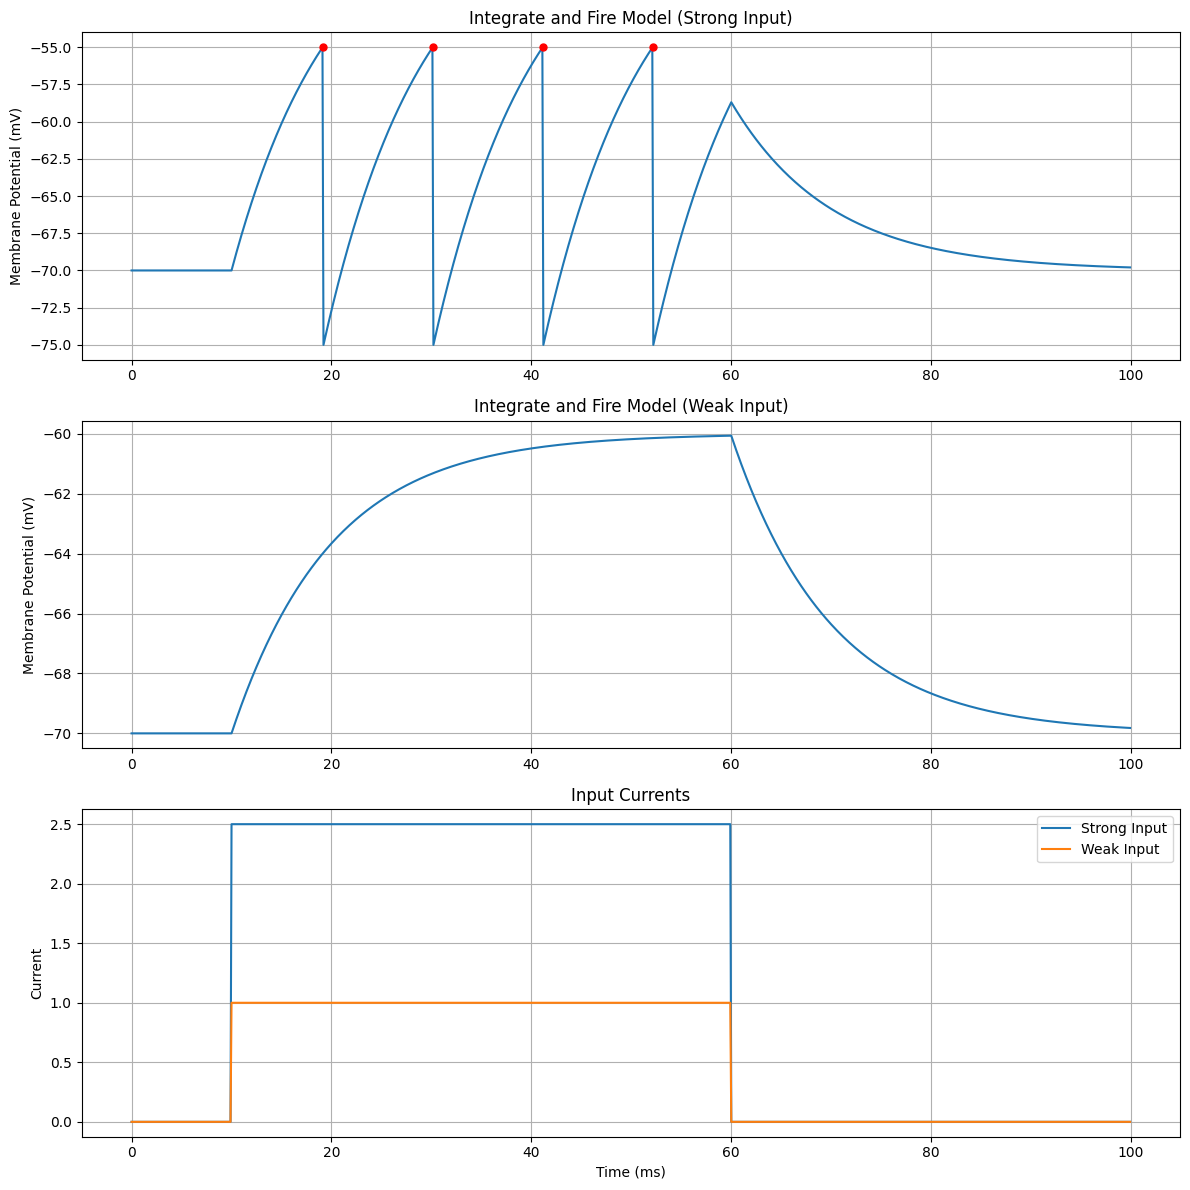

In [42]:
t, V1, spikes1 = integrate_and_fire(I1, dt, t_max, tau, R, V_rest, V_threshold, V_reset)
t, V2, spikes2 = integrate_and_fire(I2, dt, t_max, tau, R, V_rest, V_threshold, V_reset)

plt.figure(figsize=(12, 12))

# Plot for strong input
plt.subplot(3, 1, 1)
plt.plot(t, V1)
plt.plot(spikes1, [V_threshold]*len(spikes1), 'r.', markersize=10)
plt.title('Integrate and Fire Model (Strong Input)')
plt.ylabel('Membrane Potential (mV)')
plt.grid(True)

# Plot for weak input
plt.subplot(3, 1, 2)
plt.plot(t, V2)
plt.plot(spikes2, [V_threshold]*len(spikes2), 'r.', markersize=10)
plt.title('Integrate and Fire Model (Weak Input)')
plt.ylabel('Membrane Potential (mV)')
plt.grid(True)

# Plot input currents
plt.subplot(3, 1, 3)
plt.plot(t, I1, label='Strong Input')
plt.plot(t, I2, label='Weak Input')
plt.title('Input Currents')
plt.xlabel('Time (ms)')
plt.ylabel('Current')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### 2.3 Discussion 

[back to top ⬆️](#table-of-contents)

The integrate and fire model code simulates a simple neuron:

1. `integrate_and_fire` takes input current, time parameters, and neuron characteristics as arguments.
2. The function initializes a voltage array and iterates through time steps.
3. At each step, it updates the voltage based on the input current and previous voltage.
4. If the voltage reaches the threshold, a spike is recorded, and the voltage is reset.
5. Model is tested with two different input currents: a strong input and a weak input.

*Observations:*

1. Strong input (I1):
   - The neuron fires multiple action potentials during the stimulation period.
   - There's a clear refractory period after each spike, where the voltage resets and gradually increases again.
   - The firing frequency is higher due to the stronger input current.

2. Weak input (I2):
   - The neuron may not reach the firing threshold, depending on the chosen parameters.
   - If it does fire, the frequency is lower than with the strong input.
   - There's more apparent subthreshold behavior, where the voltage increases but doesn't reach the threshold.

3. Leakage of current:
   - Observed in both cases, but more noticeable with the weak input.
   - The voltage decays towards the resting potential when the input current is insufficient to cause firing.

4. Action potential amplitude:
   - In this simple model, the action potential amplitude doesn't change.
   - The all-or-nothing nature of the model means that once the threshold is reached, the voltage immediately resets to a fixed value.


#### **3. Hodgekins and Huxley Model**

#### 3.1 Introduction

[back to top ⬆️](#table-of-contents)

The Hodgkin-Huxley model is a detailed mathematical model of action potential generation in neurons. It describes the dynamics of voltage-gated ion channels and their effect on the membrane potential.


#### 3.2 Methods and Results

[back to top ⬆️](#table-of-contents)

In [43]:
class HodgkinHuxley:
    def __init__(self):
        self.g_Na = 120.0
        self.g_K = 36.0
        self.g_L = 0.3
        self.E_Na = 50.0
        self.E_K = -77.0
        self.E_L = -54.387
        self.C_m = 1.0

    def alpha_n(self, V):
        return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

    def beta_n(self, V):
        return 0.125 * np.exp(-(V + 65) / 80)

    def alpha_m(self, V):
        return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

    def beta_m(self, V):
        return 4 * np.exp(-(V + 65) / 18)

    def alpha_h(self, V):
        return 0.07 * np.exp(-(V + 65) / 20)

    def beta_h(self, V):
        return 1 / (1 + np.exp(-(V + 35) / 10))

    def I_Na(self, V, m, h):
        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):
        return self.g_K * n**4 * (V - self.E_K)

    def I_L(self, V):
        return self.g_L * (V - self.E_L)

    def dALLdt(self, X, t, I):
        V, m, h, n = X

        dVdt = (I - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V) * (1.0 - m) - self.beta_m(V) * m
        dhdt = self.alpha_h(V) * (1.0 - h) - self.beta_h(V) * h
        dndt = self.alpha_n(V) * (1.0 - n) - self.beta_n(V) * n

        return [dVdt, dmdt, dhdt, dndt]

def simulate_HH(model, I, T, dt):
    t = np.arange(0, T, dt)
    X = np.zeros((len(t), 4))
    X[0] = [-65, 0.05, 0.6, 0.32]  # Initial values for V, m, h, n

    for i in range(1, len(t)):
        k1 = np.array(model.dALLdt(X[i-1], t[i-1], I[i-1]))
        k2 = np.array(model.dALLdt(X[i-1] + dt/2*k1, t[i-1] + dt/2, I[i-1]))
        k3 = np.array(model.dALLdt(X[i-1] + dt/2*k2, t[i-1] + dt/2, I[i-1]))
        k4 = np.array(model.dALLdt(X[i-1] + dt*k3, t[i-1] + dt, I[i-1]))
        X[i] = X[i-1] + dt/6*(k1 + 2*k2 + 2*k3 + k4)

    return t, X

In [44]:
model = HodgkinHuxley()
T = 20  # Total time in ms
dt = 0.01  # Time step in ms
t = np.arange(0, T, dt)

# Generate different input currents
I1 = 10 * np.ones_like(t)  # Strong constant input
I2 = 5 * np.ones_like(t)   # Weak constant input
I3 = 15 * (t > 5) * (t < 7)  # Strong pulse input


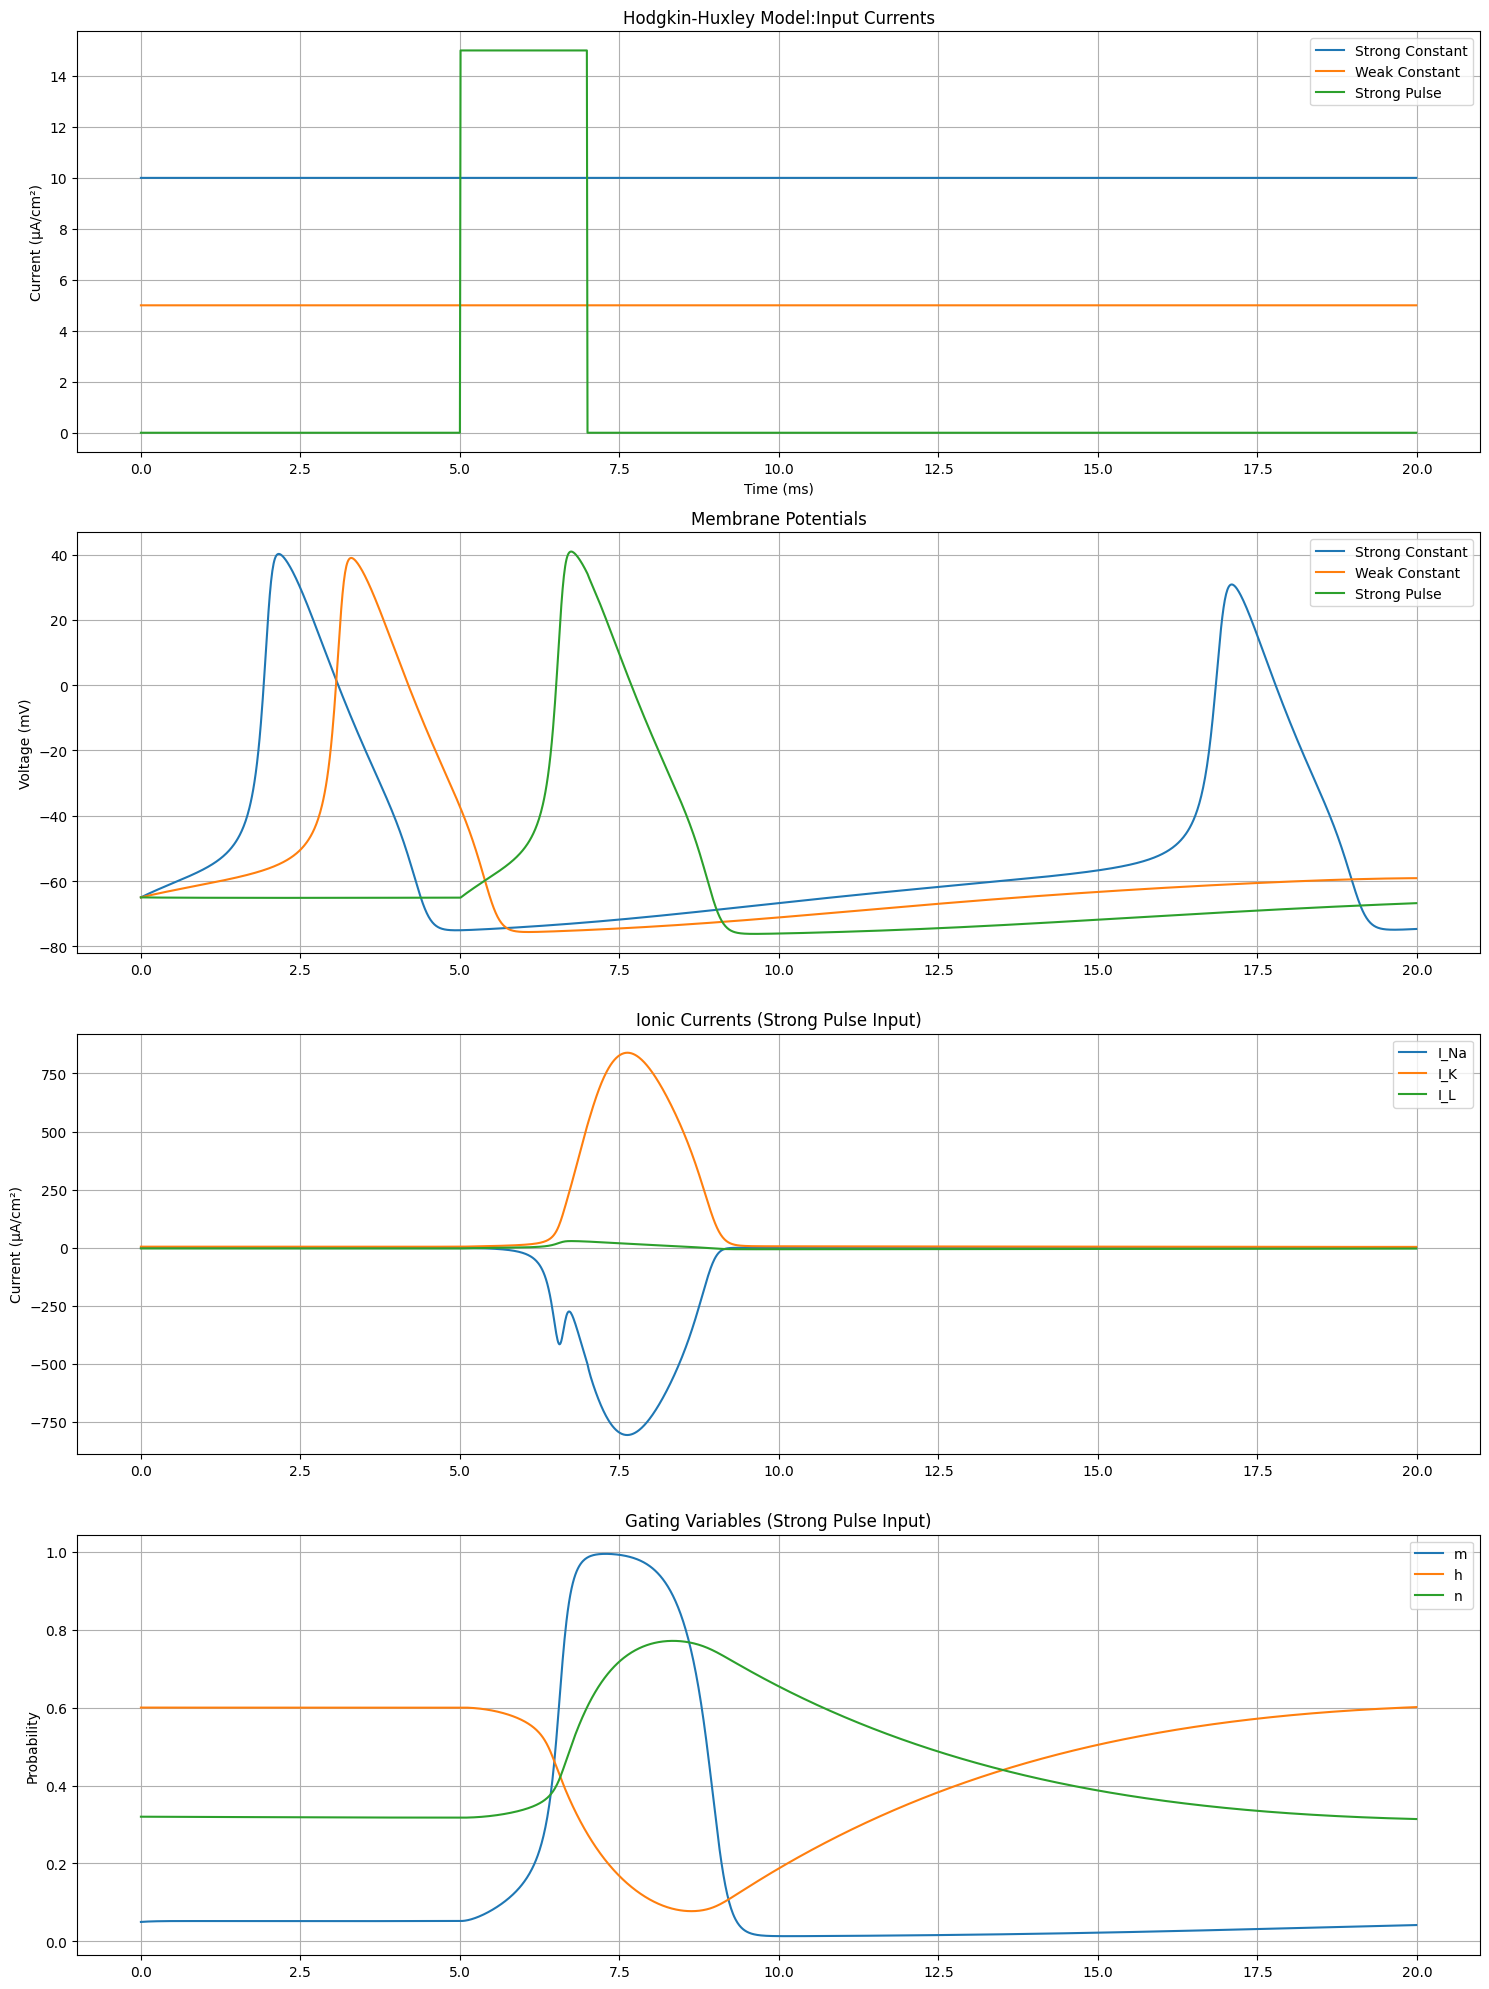

In [45]:
# Simulate for different inputs
t, X1 = simulate_HH(model, I1, T, dt)
t, X2 = simulate_HH(model, I2, T, dt)
t, X3 = simulate_HH(model, I3, T, dt)

plt.figure(figsize=(15, 20))

# Plot input currents
plt.subplot(4, 1, 1)
plt.plot(t, I1, label='Strong Constant')
plt.plot(t, I2, label='Weak Constant')
plt.plot(t, I3, label='Strong Pulse')
plt.title('Hodgkin-Huxley Model:Input Currents')
plt.xlabel('Time (ms)')
plt.ylabel('Current (µA/cm²)')
plt.legend()
plt.grid(True)

# Plot membrane potentials
plt.subplot(4, 1, 2)
plt.plot(t, X1[:, 0], label='Strong Constant')
plt.plot(t, X2[:, 0], label='Weak Constant')
plt.plot(t, X3[:, 0], label='Strong Pulse')
plt.title('Membrane Potentials')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.grid(True)

# Plot ionic currents for strong pulse input
plt.subplot(4, 1, 3)
plt.plot(t, model.I_Na(X3[:, 0], X3[:, 1], X3[:, 2]), label='I_Na')
plt.plot(t, model.I_K(X3[:, 0], X3[:, 3]), label='I_K')
plt.plot(t, model.I_L(X3[:, 0]), label='I_L')
plt.title('Ionic Currents (Strong Pulse Input)')
plt.ylabel('Current (µA/cm²)')
plt.legend()
plt.grid(True)

# Plot gating variables for strong pulse input
plt.subplot(4, 1, 4)
plt.plot(t, X3[:, 1], label='m')
plt.plot(t, X3[:, 2], label='h')
plt.plot(t, X3[:, 3], label='n')
plt.title('Gating Variables (Strong Pulse Input)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### 3.3 Discussion 

[back to top ⬆️](#table-of-contents)

The Hodgkin-Huxley model code implements a detailed representation of neuronal dynamics:

1. `HodgkinHuxley` class encapsulates the model's equations and parameters.
2. The class includes methods for calculating ion channel dynamics (alpha and beta functions) and ionic currents.
3. The `dALLdt` method computes the rates of change for voltage and gating variables.
4. 4th-order Runge-Kutta method is used for numerical integration in the `simulate_HH` function.
5. The model is tested with three different input currents: strong constant, weak constant, and strong pulse.

*Observations:*

1. Strong constant input (I1):
   - The neuron fires repeatedly at a high frequency.
   - Action potentials have a consistent amplitude and shape.
   - There's a clear refractory period between spikes.

2. Weak constant input (I2):
   - The neuron may not fire or fires at a lower frequency, depending on the input strength.
   - Subthreshold oscillations may be observed.
   - Demonstrates the leakage of current when the input is insufficient to trigger an action potential.

3. Strong pulse input (I3):
   - The neuron fires one or more action potentials in response to the pulse.
   - Shows the full dynamics of a single action potential, including the refractory period.
   - Allows clear observation of the changes in ionic currents and gating variables.

4. Refractory period:
   - Visible after each action potential, particularly in the strong pulse input case.
   - Caused by the inactivation of sodium channels and activation of potassium channels.

5. Leakage of current:
   - Observed in the weak input case, where the membrane potential doesn't reach the firing threshold.
   - The leak current (I_L) plays a role in returning the membrane potential to its resting state.

6. Action potential amplitude:
   - Unlike the integrate and fire model, the Hodgkin-Huxley model can show variations in action potential amplitude.
   - These variations are subtle and depend on the state of the ion channels at the time of stimulation.

7. Ionic currents and gating variables:
   - The sodium current (I_Na) rises rapidly during the upstroke of the action potential.
   - The potassium current (I_K) activates more slowly, contributing to the repolarization phase.
   - The leak current (I_L) remains relatively constant.
   - The gating variables m, h, and n show the characteristic dynamics of channel activation and inactivation during an action potential.

The Hodgkin-Huxley model provides a more detailed and biologically accurate representation of neuronal dynamics compared to the integrate and fire model, capturing the complexities of ion channel behavior and their effects on membrane potential.